In [30]:
!pip install tensorflow==2.12


INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━

In [6]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.18.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
x=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]
x.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [11]:
# 1. Create dummy variables for Geography and Gender
geography = pd.get_dummies(x['Geography'], dtype=int,drop_first=True)
gender = pd.get_dummies(x['Gender'], dtype=int,drop_first=True)

# 2. Drop original categorical columns from x
x = x.drop(['Geography', 'Gender'], axis=1)

# 3. Concatenate numerical x with new one-hot encoded columns
x = pd.concat([x, geography, gender], axis=1)


In [12]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_text,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_textt=sc.transform(x_text)

In [15]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
x_train.shape

(8000, 11)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [18]:
#initialize ANN
classifier=Sequential()

In [19]:
##input layer
classifier.add(Dense(units=11,activation='relu'))

In [20]:
##1st hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [21]:
##2nd hidden lahey
classifier.add(Dense(units=6,activation='relu'))

In [22]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [23]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
import tensorflow as tf
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [26]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7889 - loss: 0.4722 - val_accuracy: 0.8391 - val_loss: 0.3814
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8579 - loss: 0.3525 - val_accuracy: 0.8417 - val_loss: 0.3744
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8589 - loss: 0.3517 - val_accuracy: 0.8504 - val_loss: 0.3630
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8567 - loss: 0.3531 - val_accuracy: 0.8538 - val_loss: 0.3657
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8550 - loss: 0.3486 - val_accuracy: 0.8466 - val_loss: 0.3633
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8684 - loss: 0.3330 - val_accuracy: 0.8482 - val_loss: 0.3631
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8576 - loss: 0.3435 - val_accuracy: 0.8523 - val_loss: 0.3611
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8600 - loss: 0.3356 - 

In [27]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

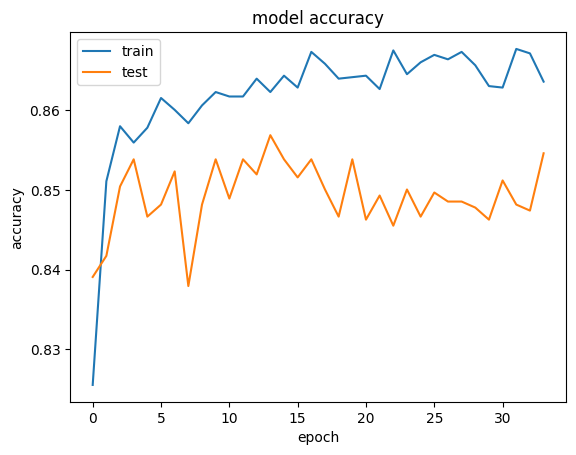

In [28]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])          # Plot training accuracy
plt.plot(model_history.history['val_accuracy'])      # Plot validation accuracy
plt.title('model accuracy')                          # Chart title
plt.ylabel('accuracy')                               # Y-axis label
plt.xlabel('epoch')                                  # X-axis label
plt.legend(['train', 'test'], loc='upper left')      # Legend
plt.show()                                           # Display plot


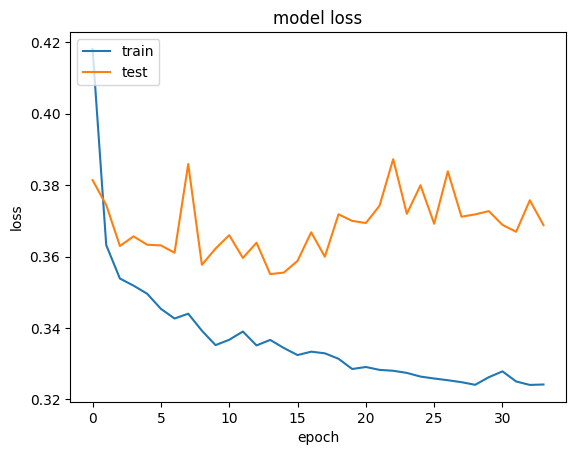

In [29]:
# summarize history for loss
plt.plot(model_history.history['loss'])          # Training loss
plt.plot(model_history.history['val_loss'])      # Validation loss
plt.title('model loss')                          # Title of the plot
plt.ylabel('loss')                               # Y-axis label
plt.xlabel('epoch')                              # X-axis label
plt.legend(['train', 'test'], loc='upper left')  # Legend
plt.show()                                       # Display the plot


In [35]:
# Predicting the Test set results
y_pred = classifier.predict(x_text)              # Predict probabilities for test data
y_pred = (y_pred > 0.5)
y_pred                        # Convert probabilities to binary values


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1532,   63],
       [ 215,  190]])

In [33]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.861

In [34]:
classifier.get_weights()

[array([[ 4.38191414e-01, -1.23881511e-01, -4.98423457e-01,
          5.22495270e-01, -2.27685086e-03, -2.62789011e-01,
         -4.37708080e-01,  1.11275114e-01, -6.20247185e-01,
          2.26632759e-01,  1.71604119e-02],
        [-7.78656542e-01,  1.42974213e-01, -2.50550699e+00,
         -1.31524837e+00,  1.38091362e+00,  1.55432165e+00,
          3.18072766e-01,  1.57100356e+00, -3.63465738e+00,
         -2.90443468e+00, -2.69589567e+00],
        [ 5.87791502e-01,  3.95142913e-01,  6.16662689e-02,
          9.88252819e-01, -4.30688292e-01,  1.05233037e+00,
          6.81251526e-01,  8.70946273e-02, -5.49592137e-01,
          1.18525422e+00,  8.42794701e-02],
        [-1.80010915e+00,  3.75475287e-01, -5.61966598e-01,
         -2.06588054e+00,  5.83037078e-01, -1.29142284e+00,
         -3.29844332e+00, -4.81028825e-01, -3.03760171e-01,
         -1.14240885e-01, -1.35935926e+00],
        [-7.62892067e-01,  3.07535982e+00, -4.88165200e-01,
         -1.68750495e-01, -7.71168470e-01,  